# Context
Công ty SuperStore là một công ty bán lẻ trên toàn cầu - Global. Nên công ty có rất nhiều khách hàng.
Nhân dịp giáng sinh và năm mới, phòng Marketing muốn chạy các chiến dịch marketing để tri ân khách hàng đã ủng hộ công ty suốt thời gian qua. Cũng như khai thác các khách có tiềm năng trở thành khách hàng trung thành.

Tuy nhiên phòng Marketing vẫn chưa phân nhóm cho từng khách hàng của năm nay được vì tập dữ liệu quá lớn nên không thể xử lý bằng tay như các năm trước, nên nhờ Phòng Phân tích dữ liệu hỗ trợ triển khai một bài toán phân loại phân khúc của từng khách hàng để triển khai từng chương trình marketing phù hợp với từng nhóm khách hàng.

# About the problem
Giám đốc Marketing cũng có đề xuất phương án sử dụng mô hình RFM, tuy nhiên trước đây khi quy mô công ty nhỏ, team có thể tự tính và phân loại bằng excel. Hiện tại lượng data quá lớn nên mong muốn Phòng dữ liệu xây dựng luồng triển khai đánh giá Segmentation thông qua lập trình Python.


# Import Package, dataset

In [ ]:
pip install squarify

In [ ]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

# define ecommerce_retail
ecommerce_retail = pd.read_excel('ecommerce retail.xlsx', sheet_name="ecommerce retail")
ecommerce_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# EDA

## **EDA Summary**
**1. Chuyển đổi kiểu dữ liệu**

  Chuyển đổi kiểu dữ liệu không phù hợp, ở đây là cột InvoiceDate

**2. Loại bỏ dữ liệu giá trị không hợp lệ**

  Loại bỏ các dữ liệu không hợp lệ theo các điều kiện sau:


*   Quantity > 0
*   UnitPrice > 0

*   InvoiceNo bắt đầu bằng "C" (đơn hàng bị hủy)

**3. Xử lý dữ liệu bị thiếu**

  Action: Loại bỏ các cột CustomerID bị thiếu

**4. Xử lý dữ liệu trùng lặp**
  Action: Loại bỏ các dữ liệu bị trùng lặp







## Get info about data types & data values

In [1]:
# Kiểm tra kiểu dữ liệu
ecommerce_retail.info()

NameError: name 'ecommerce_retail' is not defined

Nhận xét: Cột InvoiceDate đang có kiểu dữ liệu object không phù hợp, cần sửa lại thành datetime để phục vụ phân tích. Các cột còn lại đều ổn

In [ ]:
# Chuyển đổi kiểu dữ liệu cột InvoiceDate
ecommerce_retail['InvoiceDate'] = pd.to_datetime(ecommerce_retail['InvoiceDate'])
ecommerce_retail.info()

In [ ]:
# Kiểm tra data values
ecommerce_retail.describe()

In [ ]:
# Lấy những hàng có giá trị UnitPrice và Quantity < 0
ecommerce_retail[(ecommerce_retail['UnitPrice'] < 0) | (ecommerce_retail['Quantity'] < 0)]

Nhận xét: Các giá trị < 0 đều xuất phát từ các đơn hàng bị hủy

Action: Drop các hàng có giá trị < 0

In [ ]:
# Drop các hàng có giá trị < 0
ecommerce_retail = ecommerce_retail[(ecommerce_retail['UnitPrice'] > 0) & (ecommerce_retail['Quantity'] > 0)]
ecommerce_retail.describe()

## Check missing values & duplicates

In [ ]:
# Kiểm tra cột có missing values và tỷ lệ % data bị mất trong cột
missing_dict = {'volume': ecommerce_retail.isnull().sum(), 'missing_rate': ecommerce_retail.isnull().sum()/ecommerce_retail.shape[0]}
missing_df = pd.DataFrame(missing_dict)
missing_df


,volume,missing_rate
InvoiceNo,0,0.000000
StockCode,0,0.000000
Description,0,0.000000
Quantity,0,0.000000
InvoiceDate,0,0.000000
UnitPrice,0,0.000000
CustomerID,132220,0.249423
Country,0,0.000000


Nhận xét: Cột CustomerID bị null với tỉ lệ trên 20%, điểu này có thể xuất phát từ lỗi hệ thống hoặc lỗi devlog dẫn đến thiếu sót thông tin khách hàng

Action: Drop những hàng bị missing values

In [ ]:
# Drop những hàng bị missing values
ecommerce_retail.dropna(inplace=True)
ecommerce_retail.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [ ]:
# Kiểm tra cột bị duplicates
df_duplication = ecommerce_retail.duplicated(subset=["InvoiceNo","StockCode","InvoiceDate","CustomerID"])
print(ecommerce_retail[df_duplication].shape)
print(ecommerce_retail.shape)

(10038, 8)
(397884, 8)


In [ ]:
# Drop những hàng bị duplicates
ecommerce_retail.drop_duplicates(subset=["InvoiceNo","StockCode","InvoiceDate","CustomerID"], inplace=True)
ecommerce_retail.shape

(387846, 8)

# Data Processing

## Biến RFM

In [ ]:
# define total price
ecommerce_retail['TotalPrice'] = ecommerce_retail['UnitPrice']*ecommerce_retail['Quantity']

# define last day
last_day = ecommerce_retail['InvoiceDate'].max()

# RFM
RFM_df = ecommerce_retail.groupby('CustomerID').agg(
    Recency = ('InvoiceDate', lambda x: last_day - x.max()),
    Frequency = ('CustomerID', 'count'),
    Monetary = ('TotalPrice','sum'),
    Start_Day = ('InvoiceDate', 'min')
).reset_index()

RFM_df['Recency'] = RFM_df['Recency'].dt.days.astype('int')
RFM_df['Recency_reverse'] = - RFM_df['Recency']
RFM_df['Start_Day'] = pd.to_datetime(RFM_df['Start_Day'])
RFM_df['Start_Month'] = RFM_df['Start_Day'].apply(lambda x: x.strftime('%Y-%m'))
RFM_df.head()


,CustomerID,Recency,Frequency,Monetary,Start_Day,Recency_reverse,Start_Month
0,12346.0,325,1,77183.60,2011-01-18 10:01:00,-325,2011-01
1,12347.0,1,182,4310.00,2010-12-07 14:57:00,-1,2010-12
2,12348.0,74,27,1595.64,2010-12-16 19:09:00,-74,2010-12
3,12349.0,18,73,1757.55,2011-11-21 09:51:00,-18,2011-11
4,12350.0,309,17,334.40,2011-02-02 16:01:00,-309,2011-02


In [ ]:
# Using qcut to create R, F, M
RFM_df['R'] = pd.qcut(RFM_df['Recency_reverse'], 5, labels=[1, 2, 3, 4, 5]).astype(str)
RFM_df['F'] = pd.qcut(RFM_df['Frequency'], 5, labels=[1, 2, 3, 4, 5]).astype(str)
RFM_df['M'] = pd.qcut(RFM_df['Monetary'], 5, labels=[1, 2, 3, 4, 5]).astype(str)
RFM_df['RFM'] = RFM_df.apply(lambda x: x['R'] + x['F'] + x['M'], axis=1)
RFM_df.head()

,CustomerID,Recency,Frequency,Monetary,Start_Day,Recency_reverse,Start_Month,R,F,M,RFM
0,12346.0,325,1,77183.60,2011-01-18 10:01:00,-325,2011-01,1,1,5,115
1,12347.0,1,182,4310.00,2010-12-07 14:57:00,-1,2010-12,5,5,5,555
2,12348.0,74,27,1595.64,2010-12-16 19:09:00,-74,2010-12,2,2,4,224
3,12349.0,18,73,1757.55,2011-11-21 09:51:00,-18,2011-11,4,4,4,444
4,12350.0,309,17,334.40,2011-02-02 16:01:00,-309,2011-02,1,2,2,122


In [ ]:
# Segmentation
Segmentation = pd.read_excel('ecommerce retail.xlsx', sheet_name="Segmentation")
Segmentation['RFM Score'] = Segmentation['RFM Score'].str.split(',')
Segmentation = Segmentation.explode('RFM Score').reset_index(drop=True)
Segmentation.head()

,Segment,RFM Score
0,Champions,555
1,Champions,554
2,Champions,544
3,Champions,545
4,Champions,454


In [ ]:
# Merge Segmentation
RFM_df_final = RFM_df.merge(Segmentation, left_on='RFM', right_on='RFM Score', how='left')
RFM_df_final.head()

,CustomerID,Recency,Frequency,Monetary,Start_Day,Recency_reverse,Start_Month,R,F,M,RFM,Segment,RFM Score
0,12346.0,325,1,77183.60,2011-01-18 10:01:00,-325,2011-01,1,1,5,115,Cannot Lose Them,115
1,12347.0,1,182,4310.00,2010-12-07 14:57:00,-1,2010-12,5,5,5,555,Champions,555
2,12348.0,74,27,1595.64,2010-12-16 19:09:00,-74,2010-12,2,2,4,224,NaN,NaN
3,12349.0,18,73,1757.55,2011-11-21 09:51:00,-18,2011-11,4,4,4,444,NaN,NaN
4,12350.0,309,17,334.40,2011-02-02 16:01:00,-309,2011-02,1,2,2,122,NaN,NaN


In [ ]:
Segmentation['RFM Score'] = Segmentation['RFM Score'].apply(lambda x: x.strip())

In [ ]:
RFM_df_final = RFM_df.merge(Segmentation, left_on='RFM', right_on='RFM Score', how='left')
RFM_df_final.head()

,CustomerID,Recency,Frequency,Monetary,Start_Day,Recency_reverse,Start_Month,R,F,M,RFM,Segment,RFM Score
0,12346.0,325,1,77183.60,2011-01-18 10:01:00,-325,2011-01,1,1,5,115,Cannot Lose Them,115
1,12347.0,1,182,4310.00,2010-12-07 14:57:00,-1,2010-12,5,5,5,555,Champions,555
2,12348.0,74,27,1595.64,2010-12-16 19:09:00,-74,2010-12,2,2,4,224,At Risk,224
3,12349.0,18,73,1757.55,2011-11-21 09:51:00,-18,2011-11,4,4,4,444,Loyal,444
4,12350.0,309,17,334.40,2011-02-02 16:01:00,-309,2011-02,1,2,2,122,Hibernating customers,122


# Visualization

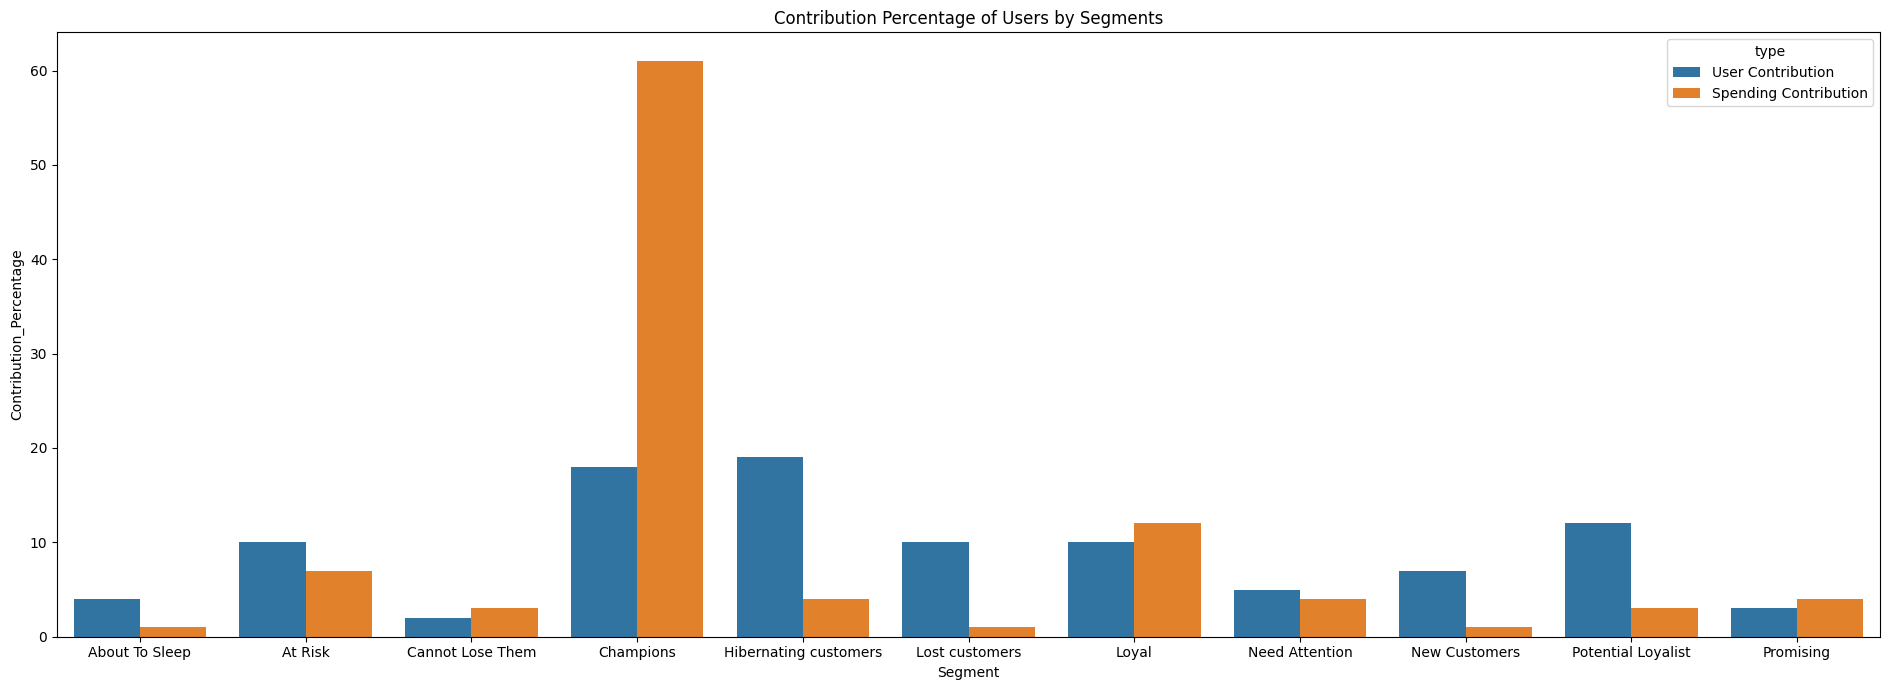

In [ ]:
# @title
# segment_by_user_count
segment_by_user_count = RFM_df_final[['Segment', 'CustomerID']].groupby('Segment').count().reset_index().rename(columns={'CustomerID': 'User Count'})
segment_by_user_count['Contribution_Percentage'] = round(segment_by_user_count['User Count'] / segment_by_user_count['User Count'].sum() * 100)
segment_by_user_count['type'] = 'User Contribution'

# segment_by_spending
segment_by_spending = RFM_df_final[['Segment', 'Monetary']].groupby('Segment').sum().reset_index().rename(columns={'Monetary': 'Spending'})
segment_by_spending['Contribution_Percentage'] = round(segment_by_spending['Spending'] / segment_by_spending['Spending'].sum() * 100)
segment_by_spending['type'] = 'Spending Contribution'

segment_agg = pd.concat([segment_by_user_count, segment_by_spending])

# Create the plot
plt.figure(figsize=(19, 7))
plt.title('Contribution Percentage of Users by Segments')
sns.barplot(x='Segment', y='Contribution_Percentage', hue='type', data=segment_agg)
plt.tight_layout()
plt.show()



**Chart Definition**

Segment: Các nhóm khách hàng

Contribution_Percentage: Tỷ trọng đóng góp của các nhóm khách hàng

**Insight & Action**

1. Nhóm khách hàng **Hibernating customers** và **Lost customers** chiếm tỷ trọng cao trong cơ cấu khách hàng. Tuy nhiên nhóm này không chiếm tỷ trọng doanh thu quá lớn

Action: Thực hiện các chiến dịch react-out, gửi email để reconnect với nhóm khách hàng này, hoặc có thể bỏ qua


2. Nhóm khách hàng **Champions** và **Loyal** là các nhóm khách hàng trung thành với thương hiệu, chiếm phần lớn doanh thu.

Action: Thực hiện các chiến dịch như bốc thăm trúng thưởng, các chương trình upsale mang lại những ưu đãi hấp dẫn

3. Nhóm khách hàng **Potential Loyalist**, **Need attention** và **Promising** cũng rất đông và chiếm tỷ trọng doanh thu khá cao

Action: Thực hiện những chiến dịch ưu đãi khách hàng trung thành, ưu đãi thành viên nhằm đưa họ trở thành những khách hàng trung thành

<ipython-input-105-1358efa6bb26>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(RFM_df_final[col])


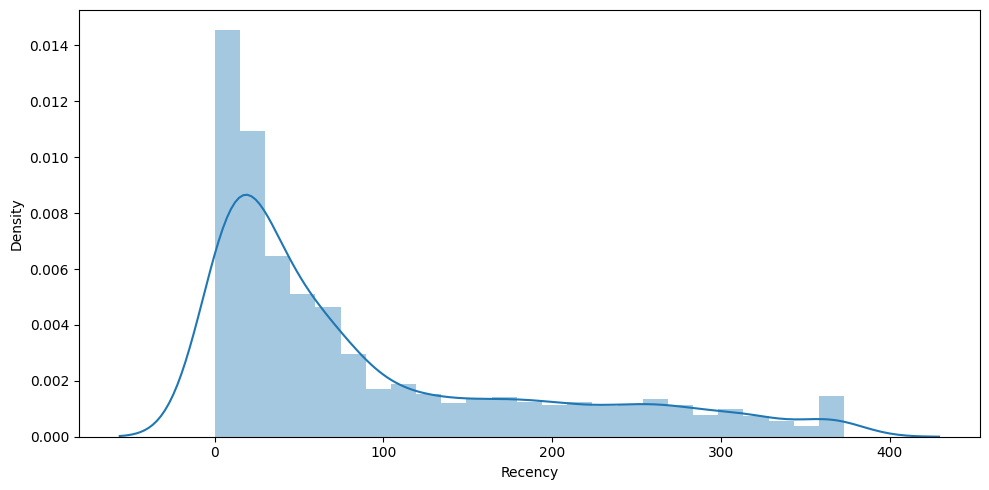

<ipython-input-105-1358efa6bb26>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(RFM_df_final[col])


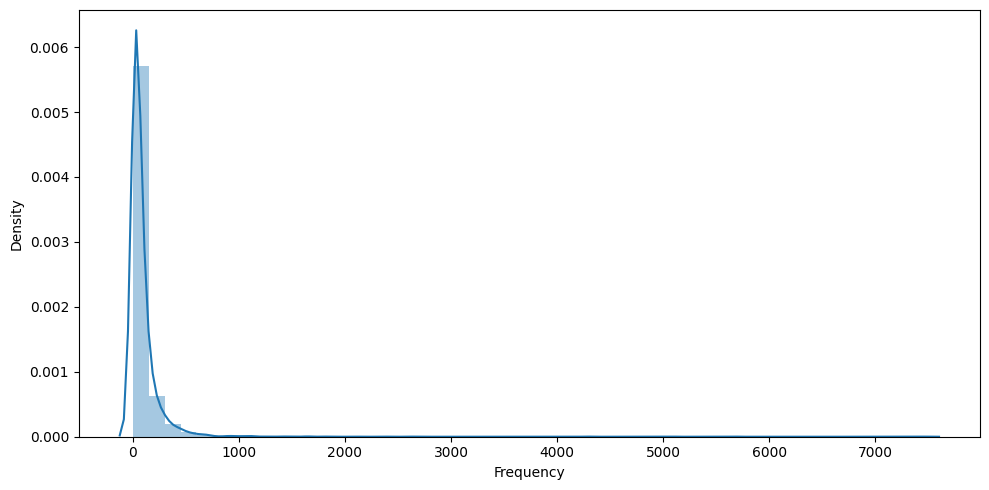

<ipython-input-105-1358efa6bb26>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(RFM_df_final[col])


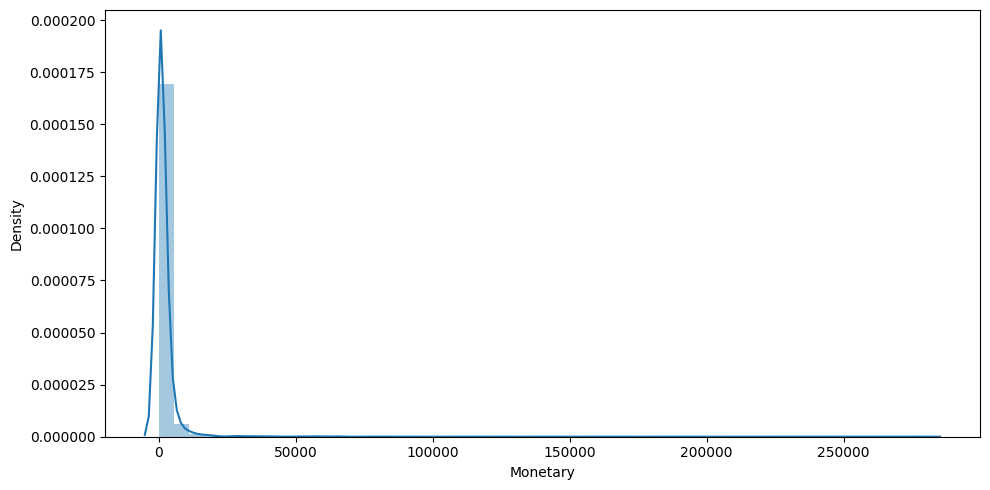

In [ ]:
# @title
# show distribution of each variables of the model
colnames = ['Recency', 'Frequency', 'Monetary']

for col in colnames:
  fig, ax = plt.subplots(figsize=(10, 5))
  sns.distplot(RFM_df_final[col])
  plt.tight_layout()
  plt.show()

**Insight**

Đối với mô hình bán lẻ như SuperStore, việc khách hàng quay lại mua hàng thường xuyên (**Recency**) là điều quan trọng nhất vì điều đó thể hiện mức độ gắn bó của khách hàng đối với thương hiệu. Một khách hàng có thể mua nhiều lần trong quá khứ nhưng lâu rồi không mua hàng lại vẫn có thể nằm trong nhóm khách hàng rời bỏ.

Tần suất mua hàng của khách hàng (**Frequency**) cũng rất quan trọng vì nó giúp xác định các khách hàng trung thành với thương hiệu.

Chi tiêu cho đơn hàng (**Monetary**) có thể bị ảnh hưởng bởi những yếu tố khác như chương trình khuyến mãi, combo nên thường không phản ánh đúng nhất hiện trạng của công ty.

Vì vậy, tôi đề xuất với team Marketing và Sales của SuperStore nên quan tâm đến chỉ số **Recency** nhiều nhất, tiếp đến là **Frequency** và **Monetary**.